# Kollokasjoner for nøkkelord

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [2]:
css()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [10]:
reference = pd.read_json('avis_agg_sample_20.json')

In [11]:
keyword = 'sykdom'

In [12]:
filename = 'collocation_' + keyword + ".csv"

## Grafstruktur topos

In [13]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [14]:
comm = gnl.community_dict(keyword_graph)

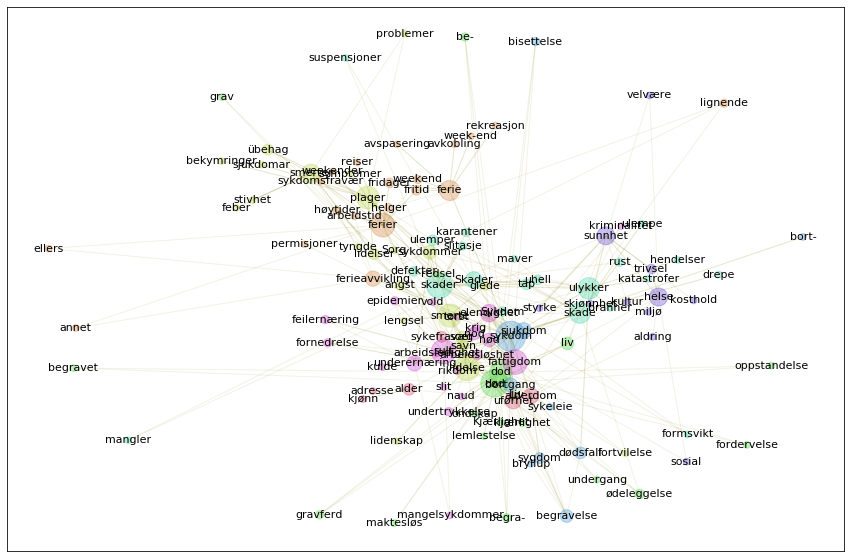

In [15]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [16]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [17]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ' ,'.join(i)))

<span style='font-size:1.1em'>kosthold ,sykdom ,sygdom ,vold ,aldring ,skader ,trivsel ,savn ,krig ,begravelse ,sykdommer ,alder ,problemer ,angst ,arbeidsløshet ,skade ,feilernæring ,liv ,epidemier ,dod ,bryllup ,sult ,elendighet ,fornedrelse ,lidelse ,velvære ,Skader ,Sykdom ,undertrykkelse ,sorg ,übehag ,uførhet ,ødeleggelse ,ulykker ,nød ,plager ,slit ,uhell ,død ,sjukdom ,nod ,mangelsykdommer ,ulemper ,arbeidsledighet ,smerter ,kultur ,helse ,ondskap ,dødsfall ,bortgang ,underernæring ,fattigdom ,sunnhet ,smerte ,alderdom ,lidelser</span>

<span style='font-size:1.1em'>sykdom ,plager ,skader ,smerter</span>

<span style='font-size:1.1em'>sykdom ,nød ,nod ,død ,sult ,fattigdom ,elendighet ,underernæring ,lidelse ,smerte ,krig ,sorg</span>

<span style='font-size:1.1em'>sykdom ,alderdom ,uførhet ,død</span>

<span style='font-size:1.1em'>sykdom ,nød ,nod ,sult ,fattigdom ,elendighet ,lidelse</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [18]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### lidelse-smerte
<span style='font-size:1.1em'>lidelse, smerte, plager, smerter, sykdommer, sorg, übehag, lidelser, angst, glede, redsel, feber, symptomer, stivhet, problemer, lengsel, fortvilelse, tyngde, lidenskap, Sorg, bekymringer, sjukdomar</span>
### død-dod
<span style='font-size:1.1em'>død, dod, liv, ødeleggelse, gravferd, be-, begra-, fordervelse, maktesløs, ondskap, begravet, Liv, kjærlighet, undergang, grav, Kjærlighet, oppstandelse, lemlestelse</span>
### skader-ulykker
<span style='font-size:1.1em'>skader, ulykker, skade, Skader, tap, ulemper, defekter, Sykdom, uhell, rust, karantener, slitasje, ulempe, mangler, katastrofer, branner, hendelser, drepe, suspensjoner, formsvikt, maver</span>
### sult-fattigdom
<span style='font-size:1.1em'>sult, fattigdom, elendighet, underernæring, nød, nod, savn, arbeidsløshet, krig, feilernæring, epidemier, fornedrelse, undertrykkelse, vold, kulde, naud, tørst, kriminalitet, slit, rikdom, mangelsykdommer, arbeidsledighet</span>
### sykdom-sjukdom
<span style='font-size:1.1em'>sykdom, sjukdom, bortgang, begravelse, dødsfall, sygdom, bisettelse, bort-, bryllup, sykeleie</span>
### helse-sunnhet
<span style='font-size:1.1em'>helse, sunnhet, trivsel, kosthold, sosial, styrke, miljø, aldring, velvære, skjønnhet, kultur</span>
### uførhet-alderdom
<span style='font-size:1.1em'>uførhet, alderdom, alder, sykefravær, adresse, kjønn</span>
### ferier-ferie
<span style='font-size:1.1em'>ferier, ferie, ferieavvikling, fridager, fritid, helger, weekend, høytider, lignende, permisjoner, reiser, arbeidstid, sykdomsfravær, annet, ellers, avspasering, weekender, avkobling, rekreasjon, week-end</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [19]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

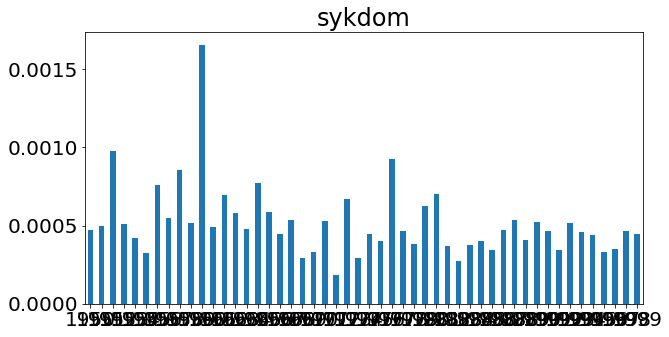

In [20]:
barchart(keyword, reference);

In [21]:
from time import time

collocations = dict()
step = 1

for i in range(1950, 2000):
    print(i)
    t0 = time()
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)
    print((time() - t0)/60, "minutter")

1950
0.9255266547203064 minutter
1951
0.6768768429756165 minutter
1952
0.7679315447807312 minutter
1953
0.7991707523663839 minutter
1954
0.8922368168830872 minutter
1955
0.8596087853113811 minutter
1956
0.8752249757448832 minutter
1957
0.8807769219080607 minutter
1958
0.7997176170349121 minutter
1959
0.7533407370249431 minutter
1960
0.9823649207750956 minutter
1961
1.4176833550135295 minutter
1962
1.159001318613688 minutter
1963
1.3565731128056844 minutter
1964
0.87858460744222 minutter
1965
0.8206877509752909 minutter
1966
1.0703389406204225 minutter
1967
0.6993381818135579 minutter
1968
0.8577812472979228 minutter
1969
0.7482987999916076 minutter
1970
0.9484342892964681 minutter
1971
0.7145145694414775 minutter
1972
0.690821131070455 minutter
1973
0.7533272345860799 minutter
1974
0.8699961543083191 minutter
1975
0.7333729028701782 minutter
1976
0.9661694208780924 minutter
1977
0.6942499160766602 minutter
1978
0.7383740186691284 minutter
1979
0.8200503826141358 minutter
1980
0.8505253

In [22]:
colls = nb.frame(collocations)

In [23]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [24]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [25]:
agg = group_frames(colls)

In [26]:
nb.normalize_corpus_dataframe(agg)

True

In [63]:
ref = group_frames(reference)
nb.normalize_corpus_dataframe(ref)

True


# Opptelling

# Sammenligner med en referanse


In [27]:
reference.sort_values(by=reference.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
.,1.39098,1.39011,1.32974,1.31876,1.31522,1.33115,1.32032,1.28226,1.31114,1.27826,1.22015,1.17079,1.23745,1.29461,1.28554,1.25099,1.2219,1.38504,1.24515,1.33251,1.29176,1.31627,1.22451,1.27574,1.24207,1.25917,1.21733,1.1969,1.21583,1.18739,1.29005,1.22005,1.24174,1.25352,1.30283,1.23567,1.3153,1.36488,1.40242,1.3226,1.35333,1.39079,1.41228,1.39136,1.29477,1.33864,1.28848,1.37039,1.23171,1.41384
",",0.76954,0.856414,0.795358,0.881156,0.806442,0.743545,0.837655,0.742889,0.754299,0.87736,0.786793,0.820144,0.748338,0.786501,0.871437,0.87292,0.836479,1.0084,0.7684,0.839177,0.735266,0.729174,0.686146,0.724146,0.737229,0.71974,0.718431,0.71361,0.667856,0.701938,0.769266,0.702013,0.738465,0.742419,0.720979,0.725155,0.80166,0.77114,0.787629,0.672002,0.640604,0.717421,0.785378,0.77462,0.758297,0.747596,0.740608,0.754163,0.731341,0.706799
i,0.448572,0.490718,0.494876,0.505146,0.495696,0.493653,0.501771,0.561204,0.493934,0.468949,0.520136,0.499579,0.500054,0.493851,0.517313,0.497924,0.500399,0.485552,0.496983,0.497255,0.494801,0.503126,0.50562,0.477942,0.492472,0.470903,0.490651,0.453728,0.479439,0.459831,0.461423,0.477404,0.446913,0.464701,0.445798,0.449428,0.410621,0.437679,0.411688,0.438477,0.440603,0.437625,0.396097,0.399638,0.407435,0.409982,0.426179,0.419586,0.406545,0.39061
og,0.383426,0.464821,0.411131,0.463728,0.430163,0.479666,0.392801,0.386091,0.413687,0.394402,0.425193,0.435716,0.444428,0.438936,0.442386,0.418031,0.439723,0.395065,0.414101,0.424339,0.344844,0.364508,0.398127,0.367014,0.37332,0.356991,0.412768,0.355218,0.400409,0.374849,0.3646,0.365743,0.36416,0.405785,0.403822,0.385317,0.373198,0.377977,0.33959,0.348051,0.322756,0.288004,0.348158,0.348168,0.298878,0.303044,0.343276,0.342268,0.354872,0.32353
er,0.218263,0.244129,0.227565,0.237595,0.235194,0.25221,0.22493,0.22228,0.234139,0.211662,0.23289,0.224294,0.225517,0.224779,0.216897,0.217586,0.217856,0.209655,0.213175,0.206154,0.19566,0.198908,0.221664,0.212436,0.228091,0.211505,0.222451,0.220346,0.226186,0.210243,0.219563,0.223764,0.211004,0.229611,0.217844,0.210852,0.206027,0.228521,0.193161,0.20312,0.20104,0.21487,0.190787,0.203987,0.202966,0.201665,0.191281,0.20129,0.206863,0.188951
det,0.211415,0.241213,0.227533,0.229656,0.23466,0.255584,0.217595,0.209046,0.230751,0.205705,0.234179,0.222644,0.232854,0.21727,0.206074,0.210301,0.225333,0.179355,0.202696,0.181327,0.175721,0.176576,0.195948,0.195361,0.202018,0.188615,0.208865,0.191718,0.194573,0.184479,0.194055,0.18228,0.176611,0.193236,0.172973,0.162115,0.166243,0.171335,0.147281,0.153739,0.153724,0.159661,0.134479,0.146996,0.13992,0.1407,0.126959,0.134905,0.145275,0.132223
til,0.211294,0.246022,0.225881,0.250039,0.228036,0.246956,0.230689,0.230958,0.23702,0.215457,0.243444,0.230365,0.251778,0.230768,0.230874,0.214544,0.228794,0.204417,0.224576,0.208807,0.221851,0.204496,0.217234,0.22028,0.226254,0.221014,0.222756,0.212368,0.21053,0.212503,0.225126,0.221852,0.21734,0.225401,0.21404,0.200512,0.19886,0.198167,0.177525,0.19539,0.187288,0.193843,0.180282,0.173306,0.176025,0.175332,0.181045,0.175954,0.177338,0.171895
av,0.185768,0.210382,0.19872,0.210461,0.197723,0.199487,0.200058,0.182342,0.192366,0.189662,0.200122,0.186039,0.190749,0.198935,0.20195,0.197942,0.201319,0.186709,0.197593,0.181895,0.18721,0.183224,0.190604,0.181473,0.183229,0.183522,0.177917,0.185628,0.180499,0.171443,0.172337,0.1697,0.165983,0.171711,0.168311,0.161372,0.158221,0.166031,0.144714,0.149101,0.14809,0.150793,0.142778,0.141303,0.13673,0.137954,0.128789,0.131942,0.142408,0.132305
som,0.184538,0.216867,0.196289,0.218786,0.204427,0.217225,0.205257,0.193064,0.207225,0.193287,0.221764,0.2004,0.212438,0.206862,0.203928,0.215046,0.209196,0.18701,0.198748,0.181824,0.187924,0.18537,0.194704,0.188052,0.197147,0.

In [28]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0696535,0.0664274,0.0657622,0.0670503,0.0657344
",",0.0426488,0.0419998,0.0379543,0.0388027,0.0392061
og,0.0289121,0.0330688,0.0321346,0.0326677,0.0314667
i,0.0195282,0.019236,0.0187206,0.0183178,0.0195733
av,0.0174766,0.0185436,0.0178545,0.016864,0.0171613
som,0.0148166,0.0143165,0.0148655,0.0152424,0.0145497
er,0.0147428,0.0141395,0.0145661,0.015005,0.0157792
en,0.0133938,0.0136983,0.0134416,0.0146449,0.0149378
for,0.014237,0.0133223,0.0128256,0.0127278,0.0124006
til,0.0109013,0.0116056,0.0126866,0.0120731,0.0117386


In [64]:
pmi = pd.DataFrame()
exp = 1.05
for i in agg:
    pmi[i] = agg[i]**exp/(pd.concat([agg[i], ref[i]],axis=1).sum(axis=1))

In [65]:
nb.normalize_corpus_dataframe(pmi)

True

<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [66]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
begravelse,1.83986e-05,1.64271e-05,1.87191e-05,1.74043e-05,1.25986e-05
død,1.82006e-05,1.61614e-05,1.87359e-05,1.78559e-05,1.30562e-05
takk,1.80771e-05,1.68602e-05,2.03647e-05,1.92334e-05,1.40301e-05
deltagelse,1.79653e-05,1.66993e-05,1.9252e-05,1.86689e-05,1.36665e-05
grunn,1.79356e-05,1.66959e-05,1.98465e-05,1.86276e-05,1.38705e-05
bortgang,1.79295e-05,1.72093e-05,2.06261e-05,1.94991e-05,1.43007e-05
all,1.77422e-05,1.64914e-05,1.93824e-05,1.84172e-05,1.34146e-05
deltakelse,1.77208e-05,1.60932e-05,1.95851e-05,1.79882e-05,1.31939e-05
lønn,1.76173e-05,1.53511e-05,1.87017e-05,1.63463e-05,1.16763e-05
min,1.7544e-05,1.59824e-05,1.87801e-05,1.68722e-05,1.16594e-05


In [67]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
begravelse,1.83986e-05,1.64271e-05,1.87191e-05,1.74043e-05,1.25986e-05
død,1.82006e-05,1.61614e-05,1.87359e-05,1.78559e-05,1.30562e-05
takk,1.80771e-05,1.68602e-05,2.03647e-05,1.92334e-05,1.40301e-05
deltagelse,1.79653e-05,1.66993e-05,1.9252e-05,1.86689e-05,1.36665e-05
grunn,1.79356e-05,1.66959e-05,1.98465e-05,1.86276e-05,1.38705e-05
bortgang,1.79295e-05,1.72093e-05,2.06261e-05,1.94991e-05,1.43007e-05
all,1.77422e-05,1.64914e-05,1.93824e-05,1.84172e-05,1.34146e-05
deltakelse,1.77208e-05,1.60932e-05,1.95851e-05,1.79882e-05,1.31939e-05
lønn,1.76173e-05,1.53511e-05,1.87017e-05,1.63463e-05,1.16763e-05
min,1.7544e-05,1.59824e-05,1.87801e-05,1.68722e-05,1.16594e-05


In [68]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
bortgang,1.79295e-05,1.72093e-05,2.06261e-05,1.94991e-05,1.43007e-05
takk,1.80771e-05,1.68602e-05,2.03647e-05,1.92334e-05,1.40301e-05
deltagelse,1.79653e-05,1.66993e-05,1.9252e-05,1.86689e-05,1.36665e-05
grunn,1.79356e-05,1.66959e-05,1.98465e-05,1.86276e-05,1.38705e-05
all,1.77422e-05,1.64914e-05,1.93824e-05,1.84172e-05,1.34146e-05
begravelse,1.83986e-05,1.64271e-05,1.87191e-05,1.74043e-05,1.25986e-05
kjære,1.73403e-05,1.62081e-05,1.89778e-05,1.80519e-05,1.33451e-05
død,1.82006e-05,1.61614e-05,1.87359e-05,1.78559e-05,1.30562e-05
grunnet,1.75374e-05,1.61331e-05,1.91618e-05,1.81083e-05,1.34691e-05
Hjertelig,1.71681e-05,1.61298e-05,1.93651e-05,1.81648e-05,1.29542e-05


In [69]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
bortgang,1.79295e-05,1.72093e-05,2.06261e-05,1.94991e-05,1.43007e-05
takk,1.80771e-05,1.68602e-05,2.03647e-05,1.92334e-05,1.40301e-05
grunn,1.79356e-05,1.66959e-05,1.98465e-05,1.86276e-05,1.38705e-05
deltakelse,1.77208e-05,1.60932e-05,1.95851e-05,1.79882e-05,1.31939e-05
all,1.77422e-05,1.64914e-05,1.93824e-05,1.84172e-05,1.34146e-05
Hjertelig,1.71681e-05,1.61298e-05,1.93651e-05,1.81648e-05,1.29542e-05
deltagelse,1.79653e-05,1.66993e-05,1.9252e-05,1.86689e-05,1.36665e-05
spesiell,1.66423e-05,1.56333e-05,1.91751e-05,1.83122e-05,1.34575e-05
grunnet,1.75374e-05,1.61331e-05,1.91618e-05,1.81083e-05,1.34691e-05
tids,1.72581e-05,1.61245e-05,1.90815e-05,1.839e-05,1.37735e-05


In [70]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
bortgang,1.79295e-05,1.72093e-05,2.06261e-05,1.94991e-05,1.43007e-05
takk,1.80771e-05,1.68602e-05,2.03647e-05,1.92334e-05,1.40301e-05
deltagelse,1.79653e-05,1.66993e-05,1.9252e-05,1.86689e-05,1.36665e-05
grunn,1.79356e-05,1.66959e-05,1.98465e-05,1.86276e-05,1.38705e-05
all,1.77422e-05,1.64914e-05,1.93824e-05,1.84172e-05,1.34146e-05
tids,1.72581e-05,1.61245e-05,1.90815e-05,1.839e-05,1.37735e-05
gr,1.63837e-05,1.53448e-05,1.84587e-05,1.83219e-05,1.33445e-05
spesiell,1.66423e-05,1.56333e-05,1.91751e-05,1.83122e-05,1.34575e-05
sykdom,1.62817e-05,1.48743e-05,1.87364e-05,1.818e-05,1.33645e-05
Hjertelig,1.71681e-05,1.61298e-05,1.93651e-05,1.81648e-05,1.29542e-05


In [71]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
bortgang,1.79295e-05,1.72093e-05,2.06261e-05,1.94991e-05,1.43007e-05
takk,1.80771e-05,1.68602e-05,2.03647e-05,1.92334e-05,1.40301e-05
grunn,1.79356e-05,1.66959e-05,1.98465e-05,1.86276e-05,1.38705e-05
tids,1.72581e-05,1.61245e-05,1.90815e-05,1.839e-05,1.37735e-05
deltagelse,1.79653e-05,1.66993e-05,1.9252e-05,1.86689e-05,1.36665e-05
alvorlig,1.60308e-05,1.49549e-05,1.84801e-05,1.81006e-05,1.35485e-05
grunnet,1.75374e-05,1.61331e-05,1.91618e-05,1.81083e-05,1.34691e-05
Alzheimers,0,0,1.49653e-05,1.73375e-05,1.34652e-05
spesiell,1.66423e-05,1.56333e-05,1.91751e-05,1.83122e-05,1.34575e-05
all,1.77422e-05,1.64914e-05,1.93824e-05,1.84172e-05,1.34146e-05


In [80]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(75).fillna(0).index

Index(['begravelse', 'død', 'takk', 'deltagelse', 'grunn', 'bortgang', 'all',
       'deltakelse', 'lønn', 'min', 'grunnet', 'kjære', 'tids', 'Grunnet',
       'Hjertelig', 'Barna', 'dod', 'TAKK', 'mors', 'spesiell', 'HJERTELIG',
       'smittsom', 'lider', 'fars', 'langvarig', 'mor', 'Familien', 'gr',
       'led', 'dagpenger', 'under', 'kjærlig', 'bevegelige', 'helligdager',
       'sykdom', 'alkoholisme', 'vår', 'alderdom', 'bisettelse',
       'hjerteligste', 'fattigdom', 'uhelbredelig', 'sult', 'hustru',
       'ulykker', 'hustrus', 'alvorlig', 'rammet', 'forhindret', 'Takk',
       'vennlig', 'dødsfall', 'fråvær', 'plaget', 'nød', 'BARNA', 'tålmodig',
       'sykepenger', 'gravferd', 'helbrede', 'Eisenhowers', 'invaliditet',
       'legemlig', 'etterlatte', 'arbeidsulykker', 'vikar', 'kronisk', 'Gr',
       'ledig', 'skyldes', 'snikende', 'sjelelig', 'tuberkuløs', 'uførhet',
       'bedriftsulykker'],
      dtype='object')

In [89]:
agg.loc[pmi.sort_values(by=pmi.columns[3], ascending=False).head(55).fillna(0).index].style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
bortgang,0.0021811,0.00452347,0.00459971,0.00357305,0.003158
takk,0.00406937,0.00448251,0.00443884,0.00353495,0.00282691
deltagelse,0.00255281,0.00287474,0.00136476,0.00162855,0.00139843
grunn,0.00634653,0.00640518,0.00575326,0.00436387,0.00422112
all,0.00431207,0.00433954,0.00338803,0.00284125,0.00235585
tids,0.00120517,0.0014733,0.00110997,0.00116577,0.00149201
gr,0.00103579,0.000895265,0.00114629,0.00176097,0.00123789
spesiell,0.00088404,0.00114487,0.00166625,0.00156443,0.00147303
sykdom,0.000662682,0.000620928,0.000968304,0.00114998,0.00107367
Hjertelig,0.00131794,0.00172639,0.00160969,0.00111606,0.000680894


In [133]:
ordliste = 'sult fattigdom titusener underernæring tragiske umenneskelige uførhet boforhold medmenneske'.split()
#sykdom_art = pmi.loc[ordliste]

In [134]:
ordliste

['sult',
 'fattigdom',
 'titusener',
 'underernæring',
 'tragiske',
 'umenneskelige',
 'uførhet',
 'boforhold',
 'medmenneske']

In [135]:
sykdom_art = (agg.loc[ordliste]/ref.loc[ordliste]).apply(round)

In [136]:
sykdom_art['translation'] = ['hunger',
 'poverty',
 'tens of thousands',
 'malnutrition',
 'tragic',
 'inhuman',
 'disability',
 'housing',
 'fellow human']

In [137]:
sykdom_art

,1950,1960,1970,1980,1990,translation
sult,68.0,194.0,144.0,224.0,82.0,hunger
fattigdom,88.0,133.0,45.0,21.0,26.0,poverty
titusener,1.0,3.0,27.0,87.0,5.0,tens of thousands
underernæring,58.0,62.0,153.0,230.0,59.0,malnutrition
tragiske,5.0,2.0,13.0,20.0,2.0,tragic
umenneskelige,7.0,2.0,26.0,71.0,9.0,inhuman
uførhet,993.0,320.0,392.0,497.0,265.0,disability
boforhold,NaN,NaN,49.0,84.0,7.0,housing
medmenneske,3.0,7.0,3.0,3.0,6.0,fellow human


In [138]:
sykdom_art.style.background_gradient(axis=1)

,1950,1960,1970,1980,1990,translation
sult,68,194,144,224,82,hunger
fattigdom,88,133,45,21,26,poverty
titusener,1,3,27,87,5,tens of thousands
underernæring,58,62,153,230,59,malnutrition
tragiske,5,2,13,20,2,tragic
umenneskelige,7,2,26,71,9,inhuman
uførhet,993,320,392,497,265,disability
boforhold,nan,nan,49,84,7,housing
medmenneske,3,7,3,3,6,fellow human


In [116]:
(agg.loc[ordliste]/ref.loc[ordliste]).apply(round).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
sult,68,194,144,224,82
fattigdom,88,133,45,21,26
titusener,1,3,27,87,5
og,1,2,2,2,2
underernæring,58,62,153,230,59
tragiske,5,2,13,20,2
umenneskelige,7,2,26,71,9
uførhet,993,320,392,497,265
boforhold,0,0,49,84,7
medmenneske,3,7,3,3,6


In [72]:
pmi.to_csv(filename)

# Assosiasjoner og variasjon over år.

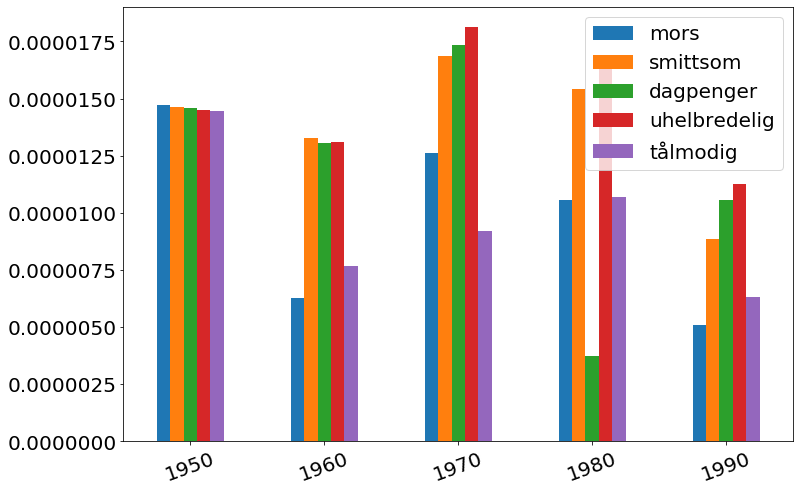

In [38]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [39]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

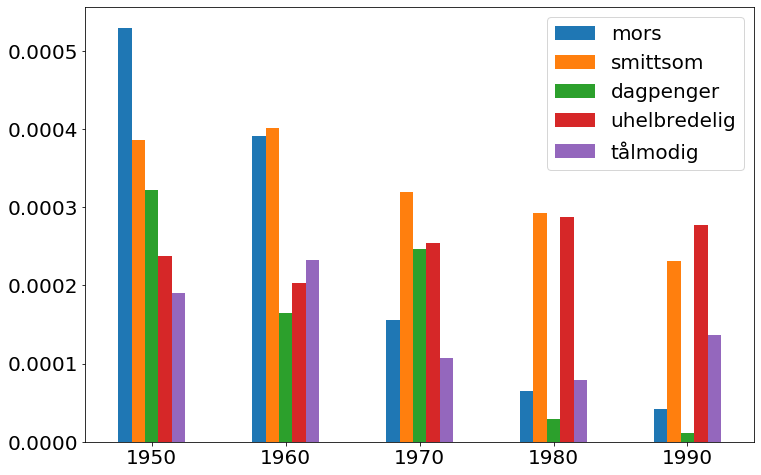

In [40]:
freq_assoc_val(agg, pmi, 0)

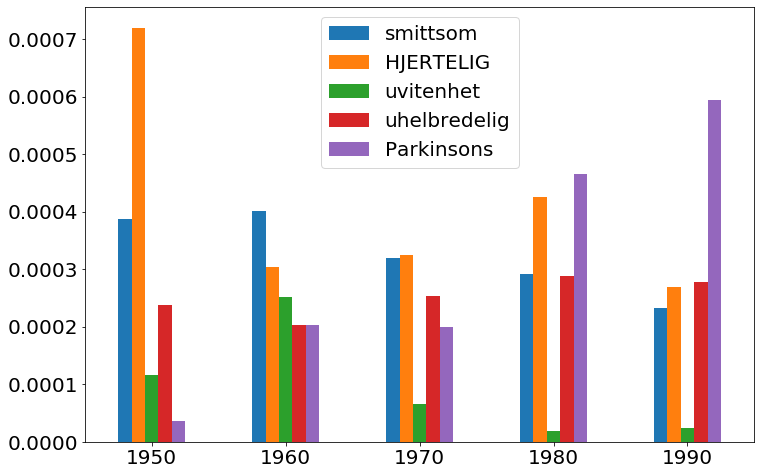

In [41]:
freq_assoc_val(agg, pmi, 1)

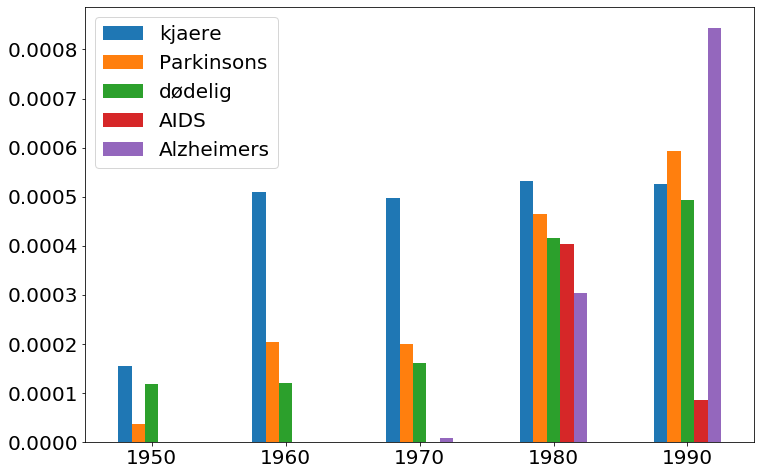

In [42]:
freq_assoc_val(agg, pmi, 3)

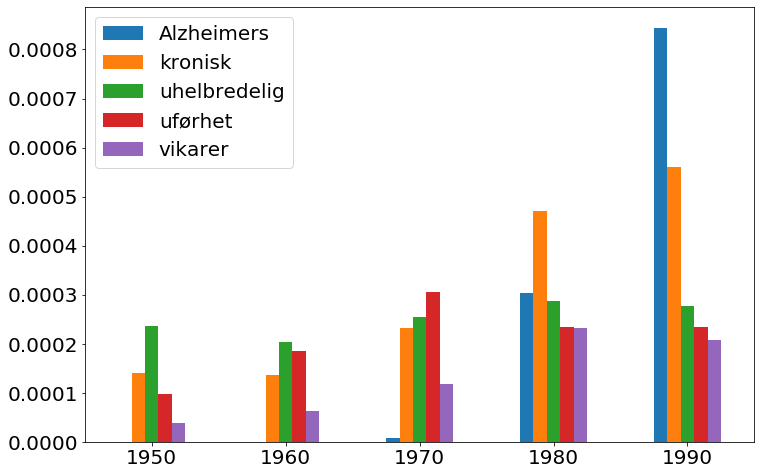

In [43]:
freq_assoc_val(agg, pmi, 4)

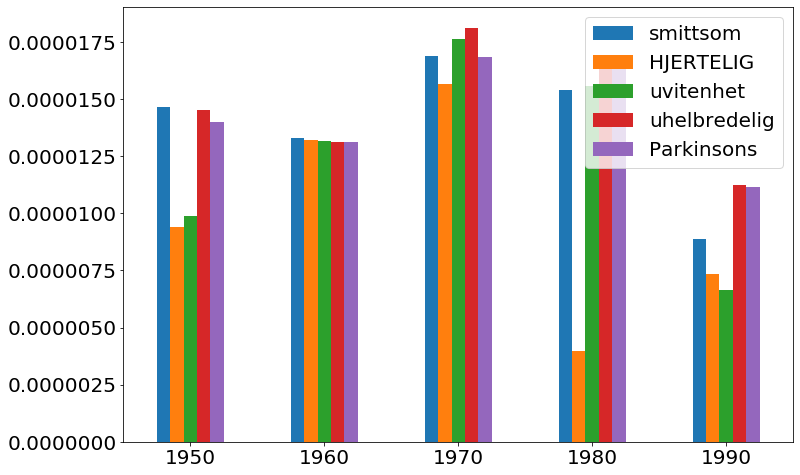

In [44]:
freq_assoc_val(pmi, pmi, 1)

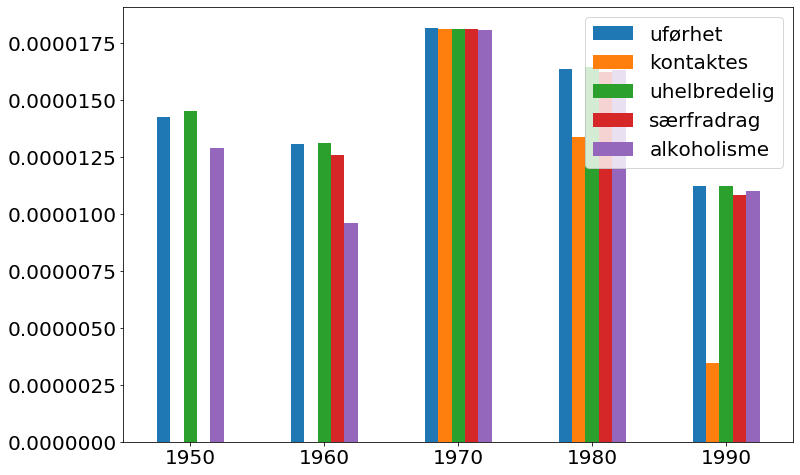

In [45]:
freq_assoc_val(pmi, pmi, 2)

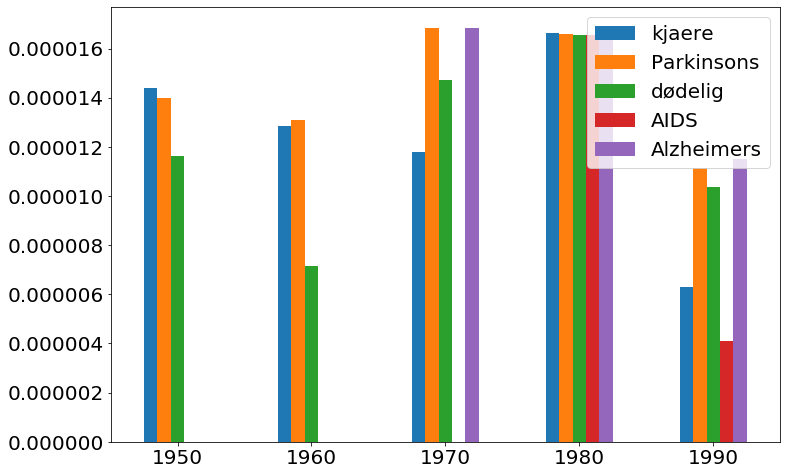

In [46]:
freq_assoc_val(pmi, pmi, 3)

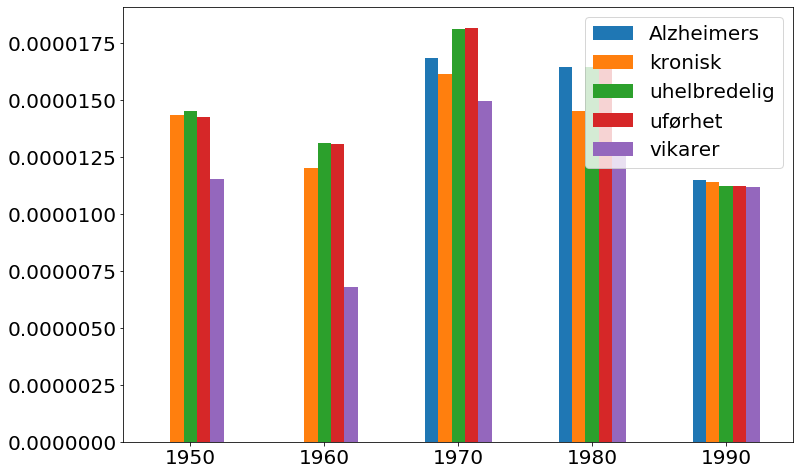

In [47]:
freq_assoc_val(pmi, pmi, 4)

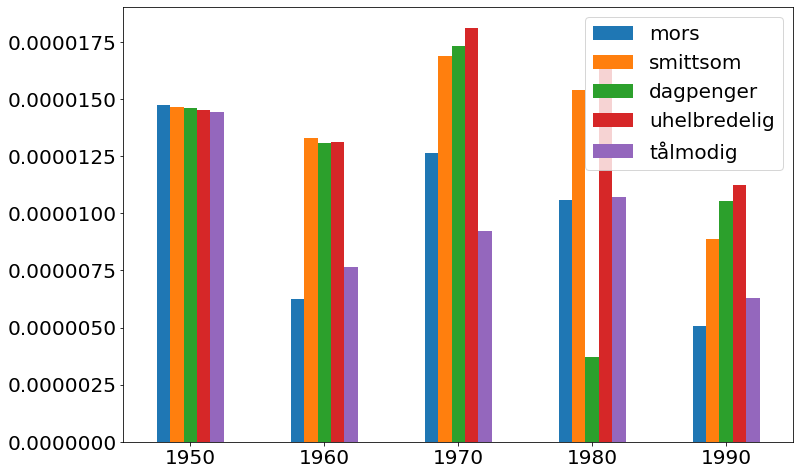

In [48]:
freq_assoc_val(pmi, pmi, 0)

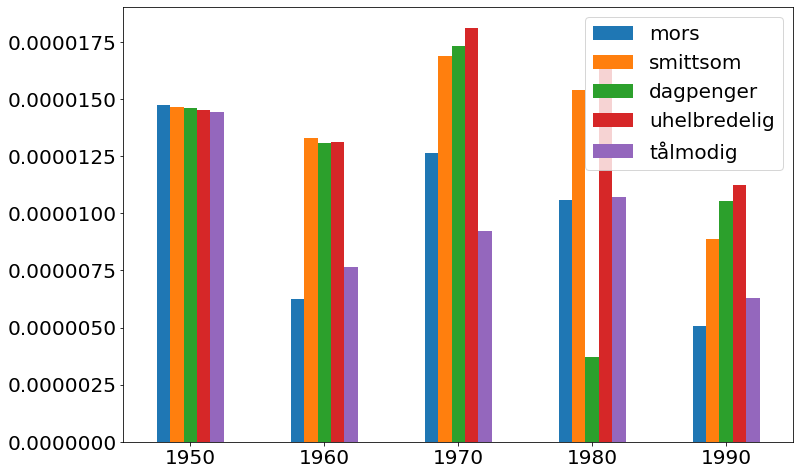

In [49]:
freq_assoc_val(pmi, pmi, 0)

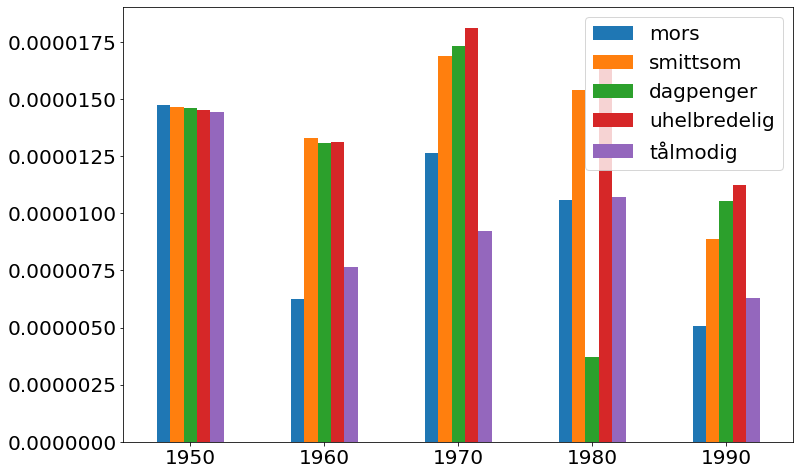

In [50]:
freq_assoc_val(pmi, pmi, 0)

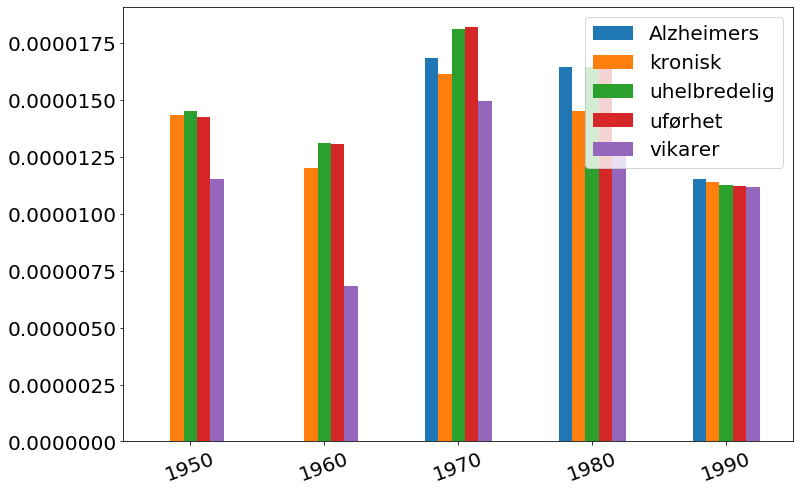

In [51]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

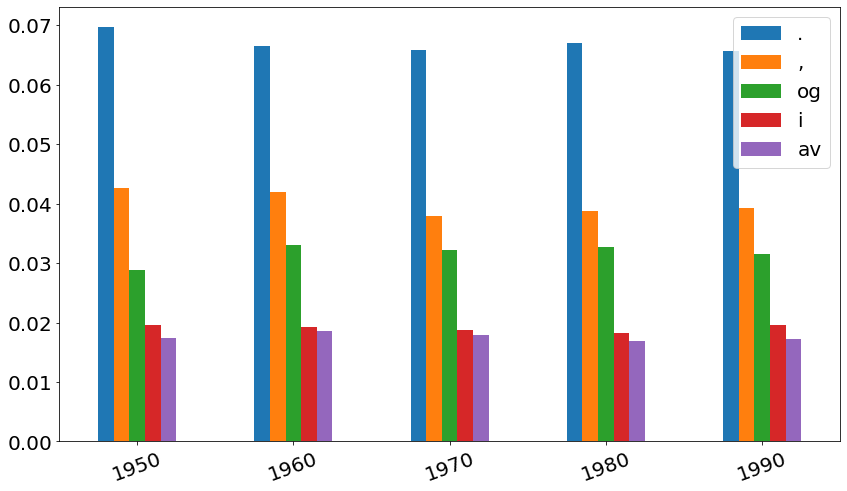

In [52]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [53]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>P.g, Føllings, Kreft, Francos, NATIONEN, Sykdommen, Epilepsi, Sult, Alkoholisme, Særfradrag, Hjarteleg, Arbeidstaker, Pensjonsrettigheter, Omsorg, Bechterews, 1979., Sykdommer, Landsforeningen</span>

## subst
<span style='font-size:1.1em'>uførhet, særfradrag, alkoholisme, kreft, sykepengene, helbredelse, ervervsevne, lyte, klassefradrag, pensjonspoeng, uvitenhet, arbeidstakeren, epilepsi, barselpenger, forkjølelse, egenmelding, virus, svangerskapet, spedalskhet, symptomene, pleiere, lungeemfysem, graviditet, homofili, bortgang, sklerose, analfabetisme, yrkesskade, hjernehinnebetennelse, forskuddstrekk, forsørgere, legehjelp, grannet, fraværsdag, utmattelse, syfilis</span>
## verb
<span style='font-size:1.1em'>kontaktes, forbigåes, tilkalles, fremkaller, kurere, forsørget, forårsake, fremkalle, utslett, lignes</span>
## adj
<span style='font-size:1.1em'>uhelbredelig, snikende, mental, legemlig, fraværende, revmatisk, hjemmearbeidende, venerisk, smittsomme, uforskyldt, kroniske</span>
## unknown
<span style='font-size:1.1em'>tfor, uforhet, kja, gelse, forsørgelse, sykedag, pasientens, arbeidsuførhet, saerskilt, hustrus, boforhold, skatteevne, sykelønnsordningen, sestre, beordringstillegg, begra-, sykefraværet, medfolelse, eiers, datters, pusteevne, forebyggelse, matmangel, sykelønnsordning, fråværet</span>


# Hvordan utvikler ordene seg?

In [54]:
barchart = lambda w, title='', df=pmi: df.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

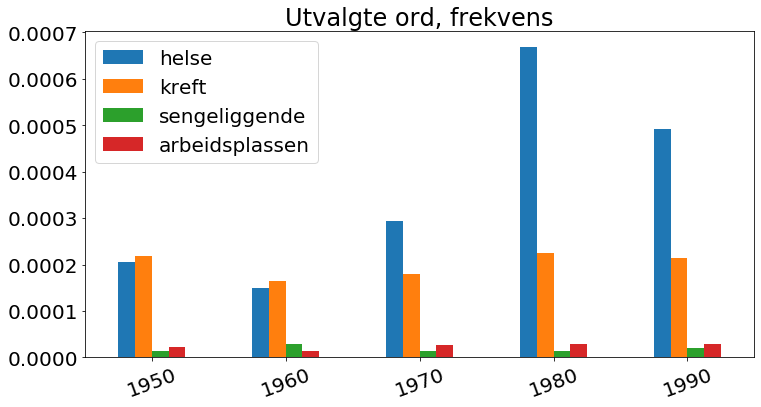

In [55]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

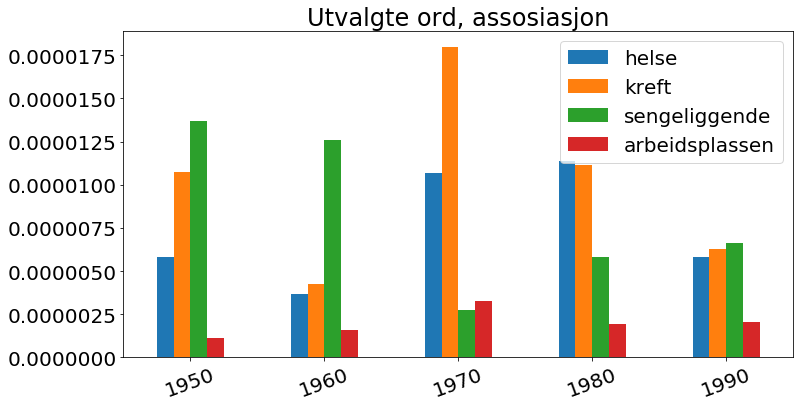

In [56]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

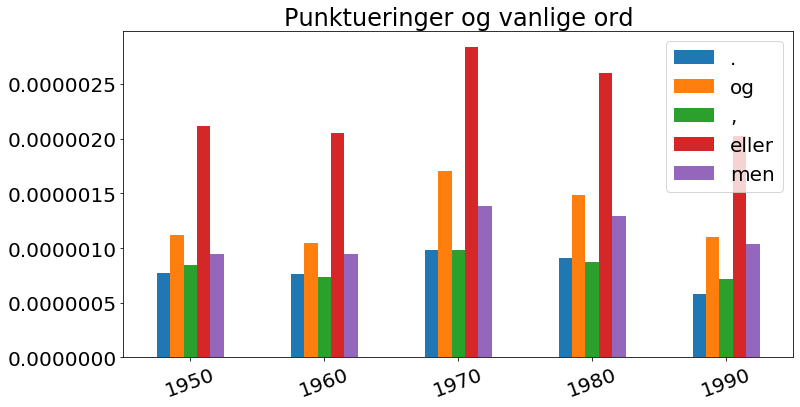

In [57]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

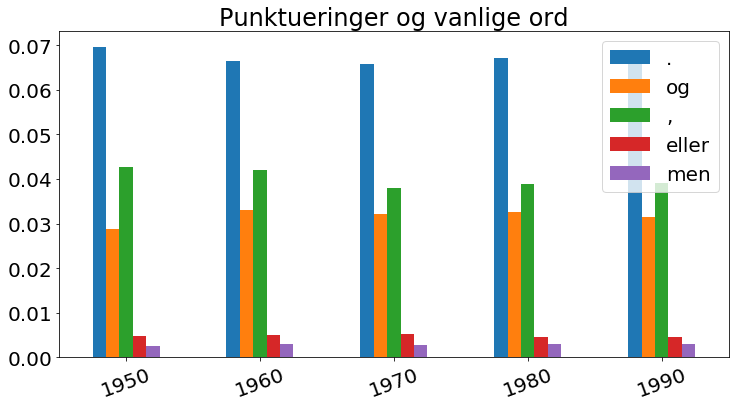

In [58]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [59]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

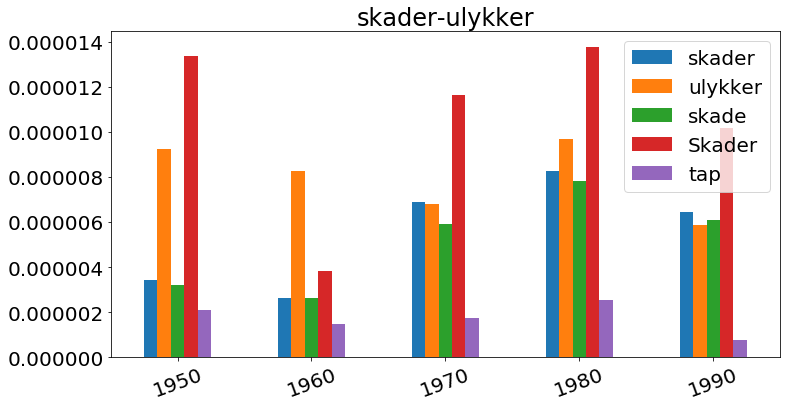

In [60]:
commchart(2, (0,5));

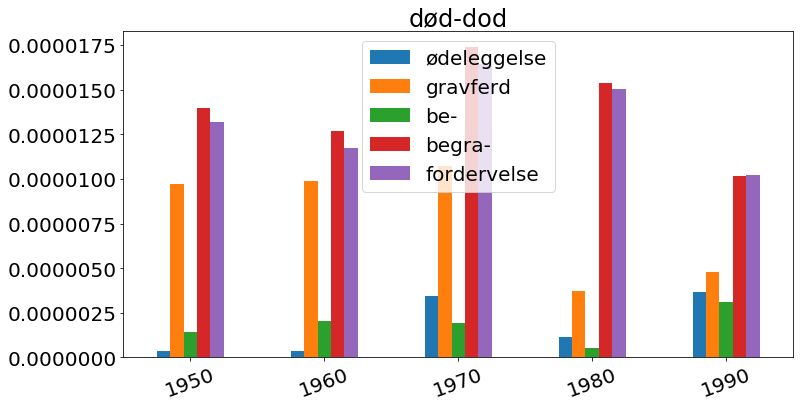

In [61]:
commchart(1, (3, 8))

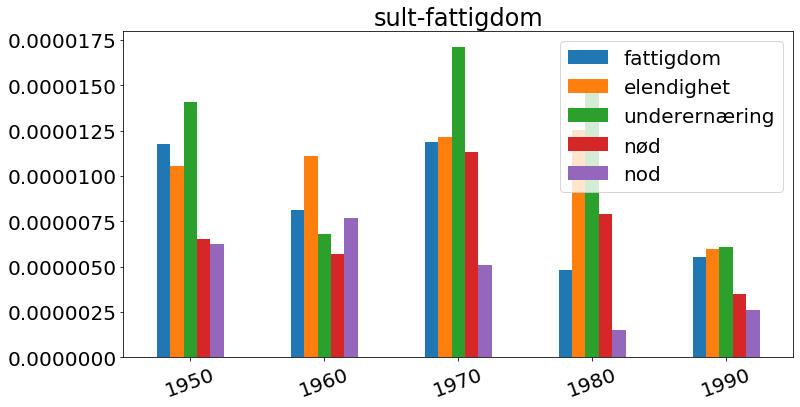

In [62]:
commchart(3)